In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

df = pd.read_csv("housing.csv")

df = df.drop(columns=["ocean_proximity"])


X = df.drop(columns=["median_house_value"])
y = df["median_house_value"]


imputer = SimpleImputer(strategy="median")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [2]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)

ridge_r2 = r2_score(y_test, ridge_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))

print("====== Ridge Regression ======")
print("R² Score:", ridge_r2)
print("RMSE:", ridge_rmse)


====== Ridge Regression ======
R² Score: 0.6138686241889177
RMSE: 71132.97559102623


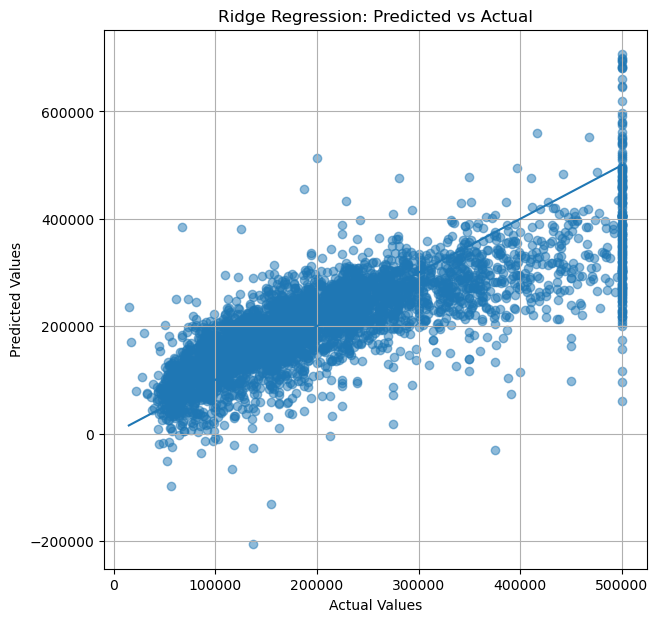

In [3]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, ridge_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])

plt.title("Ridge Regression: Predicted vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()


In [4]:
from sklearn.linear_model import Lasso

# Lasso model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predictions
lasso_pred = lasso.predict(X_test)

# Metrics
lasso_r2 = r2_score(y_test, lasso_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))

print("====== Lasso Regression ======")
print("R² Score:", lasso_r2)
print("RMSE:", lasso_rmse)


====== Lasso Regression ======
R² Score: 0.6138665661051956
RMSE: 71133.16516047495


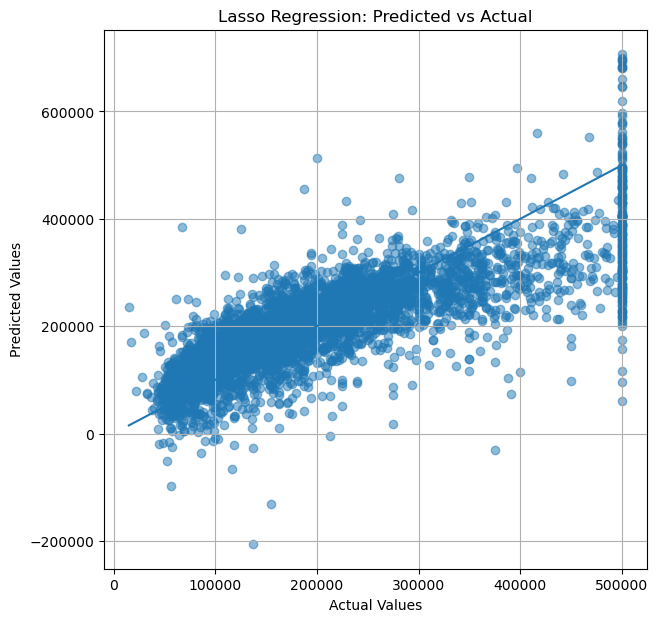

In [5]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, lasso_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])

plt.title("Lasso Regression: Predicted vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()
